### Python based viewer tool for "Probabilistic Reasoning over time", EDAP01 Artificial Intelligence
This notebook has been provided to you by Alexander Dürr, teaching assistant on the course, spring term 2021. It is based on the ideas and structure of the original Java skeleton for this assignment, provided by Elin A. Topp. Contact us (elin_anna.topp at cs.lth.se) in case you need help!

### Note: Installing and activating widgets for Jupyter Notebook
To be able to display the visualization (dashboard,animations,etc.) you have to initially install the package  if you don't have it yet

### Note: Use Jupyter Lab for programming, Jupyter Notebook for visualization (optional)
This command only enables the extension for jupyter notebook and not in jupyter lab! You can edit from the comfort of jupyter lab though and when you feel like using the widgets just go to

Menu bar > Help > Launch Classic Notebook

## Here we go... inspecting the models, option 1

### Your main job will be in the file Filters.py and in the last cell of this notebook, this is only to understand the models

In _models_, all the actually interesting stuff is located, and in _Filters_ you should write your own code. Note that the visualization (next cell on inspecting the models, option 2) assumes to have access to an object of type _Localizer_ which in turn expects the filtering / smoothing to happen in _Filters.HMM_Filters.filter(sensorR)_. This means that IF you want to make use of the visualisation in grid-view (below!) also for the actual tracking, you MUST implement the filtering in _Filters.HMM_Filter.filter(sensorR)_ (or make changes in _Localizer.Localizer.update()_)



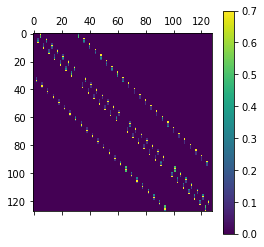

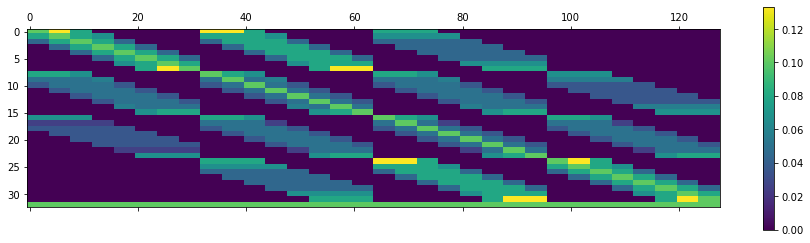

[[0.1 0.  0.  ... 0.  0.  0. ]
 [0.  0.1 0.  ... 0.  0.  0. ]
 [0.  0.  0.1 ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]]
[[0.1 0.  0.  ... 0.  0.  0. ]
 [0.  0.1 0.  ... 0.  0.  0. ]
 [0.  0.  0.1 ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.1 0.  0. ]
 [0.  0.  0.  ... 0.  0.1 0. ]
 [0.  0.  0.  ... 0.  0.  0.1]]
(True, 0, 5, 2, 0, 7, 0, 6, 1, array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.08888889, 0.08888889, 0.08888889, 0.08888889, 0.14814815,
       0.14814815, 0.14814815, 0.14814815, 0.11111111, 0.11111111,
       0.11111111, 0.11111111, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.    

In [1]:
from models import *
from view_control.Localizer import Localizer

# Testing the models, e.g., for an 4x8 grid

states = StateModel( 4, 8)
loc = Localizer( states, 1)
tMat = loc.get_transition_model()
sVecs = loc.get_observation_model()
tMat.plot_T()
sVecs.plot_o_diags()
print(sVecs.get_o_reading(0))
print(sVecs.get_o_reading(None))

print(loc.update())


## Here we go again... inspecting the models, option 2

### Your implementation job will still be in the file Filters.py, this is only to understand the models AND to get a glimpse of a tracking run (but it is slow)

In _models_, all the actually interesting stuff is located, and in _Filters_ you should write your own code. Note that this visualization assumes to have access to an object of type Localizer which in turn expects the filtering / smoothing to happen in _Filters.HMM_Filters.filter()_. This means that IF you want to make use of the visualisation in grid-view also for the actual tracking, you MUST implement the filtering in Filters.HMM_Filter.filter() (or make respective changes in _Localizer.Localizer.update()_)

### Your Task 1)
#### Inspect the visualisation of the models by running the cell and experimenting with the GUI, in particular compare and explain the different versions of the sensor model (see more detailed instructions for the task and report)

In [2]:
# In view_control.Dashboard, there is simply the handling of all the thread based visualisation provided, 
# no changes needed, but feel free...

from view_control import *

ROWS = 4
COLS = 4

# The dashboard creates a state model of the dimensions given by ROWS and COLS, sets up the respective 
# Transition and Observation models, as well as an instance of class Localizer. The Localizer calls at the 
# moment a stubb method toDo.Filters.HMMFilter.filter(sensorReading), which just sends back the original 
# probability distribution - no filtering is done. It is your task to implement something useful there.

# Non-uniform failure is the default sensor, sensor 0. Change to 1 if that is your default 
# (uniform sensor failure)
sensorType = 0
dash = Dashboard(ROWS, COLS, sensorType)
display(dash.db)


12 12 [ 0  3  6  9 12]
12 12 [ 0  3  6  9 12]


## Write your own "main" here (without the viewer)

### Your task 2)
#### Implement both Forward Filtering and Forward-Backward Smoothing with k = t-5 (a sequence length of 5)
#### Do evaluations (500 steps should be enough also for the bigger grids) according to the following, adapt the number of steps or the size of the grid if needed, but comment on it
#### Provide plots of the Manhattan distance over time

1)
* Forward Filtering with non-uniform sensor failure on 8x8 grid against
* Sensor output only (non-uniform sensor failure, count sensor failures to get the average frequency, but do not count those steps into the avg Manhattan distance) on 8x8 grid 


2)
* Forward Filtering with non-uniform sensor failure on 4x4 grid against
* Forward Filtering with uniform sensor failure on 4x4 grid


3)
* Forward Filtering with non-uniform sensor failure on 16x20 grid against
* Forward Filtering with uniform sensor failure on 16x20 grid


4)
* Forward Filtering with non-uniform sensor failure on 10x10 grid against
* Smoothing (forward-backward smoothing) with k = t-5 (five steps for b) and non-uniform sensor failure on 10x10 grid

#### OBS: obviously, each pair-wise evaluation should be run based on the same true trajectory (cases 1, 2, 3) or same trajectory AND same sensor reading sequence (for case 4).

nb of sensor failures:  165
avg error guessing:  5.71
avg error forward filter (error/nb_move, Manhattan distance): 1.516
avg error sensor output:  5.91044776119403
nb of correct guesses forward filter:  39.2 %
nb of correct guesses sensor output (n_correct/n_non_failures):  0.2985074626865672 %


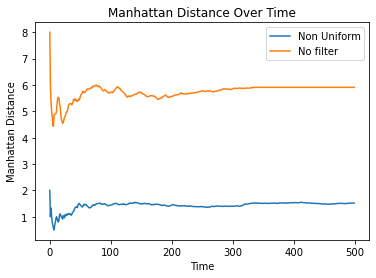

In [5]:
# In this cell, you can write your own "main" to run and evaluate your 
# implementation without using the visualisation above (should be considerably faster!)

#case 1
from models import *
from Filters import HMMFilter

import numpy as np
import matplotlib.pyplot as plt
import random

ROWS = 8
COLS = 8
sm = StateModel(ROWS,COLS)
tm = TransitionModel(sm)
om = ObservationModel_NUF.ObservationModel(sm)
true_state = random.randint(0, sm.get_num_of_states() - 1)
sense = None
probs = np.ones(sm.get_num_of_states()) / (sm.get_num_of_states())
estimate = sm.state_to_position(np.argmax(probs))
        
rs = RobotSim(true_state, sm)
HMM = HMMFilter(probs, tm, om, sm)
error1 = 0; n_correct1 = 0; error2 = 0; n_correct2 = 0; j = 0; errorG = 0
n_sensor_f = 0
distance1 = np.zeros(500)
distance2 = np.zeros(500)

for i in range(500):
    #taken from the function update() of Localizer
    trueState = rs.move_once(tm)
    sense = rs.sense_in_current_state(om)
    probs = HMM.filter(sense)
      
    fPositions = probs.copy()
        
    for state in range(0, sm.get_num_of_states(), 4) :
        fPositions[state:state+4] = sum(fPositions[state:state+4])
            
    estimate = sm.state_to_position(np.argmax(fPositions))
        
    ret = False  # in case the sensor reading is "nothing" this is kept...
    
    tsX, tsY, tsH = sm.state_to_pose(trueState)    
    gX = random.randint(0,ROWS)  
    gY = random.randint(0,COLS)
    err = abs(tsX-gX) + abs(tsY-gY)
    errorG += err
    eX, eY = estimate
    err1 = abs(tsX-eX) + abs(tsY-eY)
    if (err1 == 0): n_correct1 += 1
    error1 += err1
    distance1[i] = err1
    if sense != None:
        ssX, ssY, ssH = sm.state_to_pose(sense) #just what the sensor gets
        err2 = abs(tsX-ssX) + abs(tsY-ssY)
        if (err2 == 0): n_correct2 += 1
        error2 += err2
        distance2[j] = err2
        j += 1 
    else: n_sensor_f += 1
    
avg_distance1 = np.zeros(500)
avg_distance2 = np.zeros(500)

for i in range(1,501):
    avg_distance1[i-1] = np.mean(distance1[:i])
for i in range(1,j+1):
    avg_distance2[i-1] = np.mean(distance2[:i])
for i in range(j,500):
    avg_distance2[i] = avg_distance2[j-1]
    
print("nb of sensor failures: ", n_sensor_f)
print("avg error guessing: ", errorG/500)
print("avg error forward filter (error/nb_move, Manhattan distance):", error1/500)
print("avg error sensor output: ", error2/(500-n_sensor_f))
print("nb of correct guesses forward filter: ", n_correct1/500 *100, "%")
print("nb of correct guesses sensor output (n_correct/n_non_failures): ", n_correct2/(500-n_sensor_f) *100, "%")
plt.plot(np.arange(0, 500, 1), avg_distance1, label = "Non Uniform")
plt.plot(np.arange(0, 500, 1), avg_distance2, label = "No filter")
plt.title('Manhattan Distance Over Time')
plt.xlabel('Time')
plt.ylabel('Manhattan Distance')
plt.legend()
plt.show()

avg error non uniform (error/nb_move, Manhattan distance): 1.856
avg error uniform:  1.836
nb of correct guesses non uniform:  28.4 %
nb of correct guesses uniform:  20.200000000000003 %


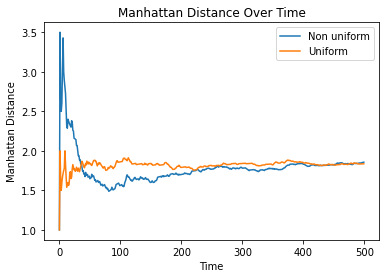

In [4]:
#case 2:
from models import *
from Filters import HMMFilter
import numpy as np
import matplotlib.pyplot as plt
import random

ROWS = 4
COLS = 4
sm = StateModel(ROWS,COLS)
tm = TransitionModel(sm)
om1 = ObservationModel_NUF.ObservationModel(sm)
om2 = ObservationModel_UF.ObservationModelUF(sm)
true_state = random.randint(0, sm.get_num_of_states() - 1)
sense = None
probs = np.ones(sm.get_num_of_states()) / (sm.get_num_of_states())
estimate = sm.state_to_position(np.argmax(probs))
        
rs = RobotSim(true_state, sm)
HMM1 = HMMFilter(probs, tm, om1, sm)
HMM2 = HMMFilter(probs, tm, om2, sm)
error1 = 0; n_correct1 = 0; error2 = 0; n_correct2 = 0
distance1 = np.zeros(500)
distance2 = np.zeros(500)

for i in range(500):
    #taken from the function update() of Localizer
    trueState = rs.move_once(tm)
    sense1 = rs.sense_in_current_state(om1)
    sense2 = rs.sense_in_current_state(om2)
    probs1 = HMM1.filter(sense1)
    probs2 = HMM2.filter(sense2)
    fPositions1 = probs1.copy()
    fPositions2 = probs2.copy()
        
    for state in range(0, sm.get_num_of_states(), 4) :
        fPositions1[state:state+4] = sum(fPositions1[state:state+4])
        fPositions2[state:state+4] = sum(fPositions2[state:state+4])
            
    estimate1 = sm.state_to_position(np.argmax(fPositions1))
    estimate2 = sm.state_to_position(np.argmax(fPositions2))
    
    tsX, tsY, tsH = sm.state_to_pose(trueState)
        
    eX1, eY1 = estimate1
    err1 = abs(tsX-eX1) + abs(tsY-eY1)
    if (err1 == 0): n_correct1 += 1
    error1 += err1
    distance1[i] = err1
     
    eX2, eY2 = estimate2
    err2 = abs(tsX-eX2) + abs(tsY-eY2)
    if (err2 == 0): n_correct2 += 1
    error2 += err2
    distance2[i] = err2
    
avg_distance1 = np.zeros(500)
avg_distance2 = np.zeros(500)

for i in range(1,501):
    avg_distance1[i-1] = np.mean(distance1[:i])
    avg_distance2[i-1] = np.mean(distance2[:i])
    
print("avg error non uniform (error/nb_move, Manhattan distance):", error1/500)
print("avg error uniform: ", error2/500)
print("nb of correct guesses non uniform: ", n_correct1/500 *100, "%")
print("nb of correct guesses uniform: ", n_correct2/500 *100, "%")
plt.plot(np.arange(0, 500, 1), avg_distance1, label = "Non uniform")
plt.plot(np.arange(0, 500, 1), avg_distance2, label = "Uniform")
plt.title('Manhattan Distance Over Time')
plt.xlabel('Time')
plt.ylabel('Manhattan Distance')
plt.legend()
plt.show()

avg error non uniform (error/nb_move), Manhattan distance): 1.636
avg error uniform:  1.396
nb of correct guesses non uniform:  36.199999999999996 %
nb of correct guesses uniform:  39.4 %


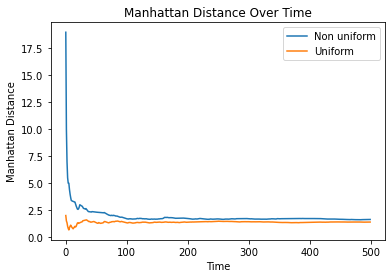

In [5]:
#case 3:
from models import *
from Filters import HMMFilter
import numpy as np
import matplotlib.pyplot as plt
import random

ROWS = 16
COLS = 20
sm = StateModel(ROWS,COLS)
tm = TransitionModel(sm)
om1 = ObservationModel_NUF.ObservationModel(sm)
om2 = ObservationModel_UF.ObservationModelUF(sm)
true_state = random.randint(0, sm.get_num_of_states() - 1)
sense = None
probs = np.ones(sm.get_num_of_states()) / (sm.get_num_of_states())
estimate = sm.state_to_position(np.argmax(probs))
        
rs = RobotSim(true_state, sm)
HMM1 = HMMFilter(probs, tm, om1, sm)
HMM2 = HMMFilter(probs, tm, om2, sm)
error1 = 0; n_correct1 = 0; error2 = 0; n_correct2 = 0
distance1 = np.zeros(500)
distance2 = np.zeros(500)

for i in range(500):
    #taken from the function update() of Localizer
    trueState = rs.move_once(tm)
    sense1 = rs.sense_in_current_state(om1)
    sense2 = rs.sense_in_current_state(om2)
    probs1 = HMM1.filter(sense1)
    probs2 = HMM2.filter(sense2)
      
    fPositions1 = probs1.copy()
    fPositions2 = probs2.copy()
        
    for state in range(0, sm.get_num_of_states(), 4) :
        fPositions1[state:state+4] = sum(fPositions1[state:state+4])
        fPositions2[state:state+4] = sum(fPositions2[state:state+4])
            
    estimate1 = sm.state_to_position(np.argmax(fPositions1))
    estimate2 = sm.state_to_position(np.argmax(fPositions2))
 
    tsX, tsY, tsH = sm.state_to_pose(trueState)
        
    eX1, eY1 = estimate1
    err1 = abs(tsX-eX1) + abs(tsY-eY1)
    if (err1 == 0): n_correct1 += 1
    error1 += err1
    distance1[i] = err1
     
    eX2, eY2 = estimate2
    err2 = abs(tsX-eX2) + abs(tsY-eY2)
    if (err2 == 0): n_correct2 += 1
    error2 += err2
    distance2[i] = err2
    
avg_distance1 = np.zeros(500)
avg_distance2 = np.zeros(500)

for i in range(1,501):
    avg_distance1[i-1] = np.mean(distance1[:i])
    avg_distance2[i-1] = np.mean(distance2[:i])
    
print("avg error non uniform (error/nb_move), Manhattan distance):", error1/500)
print("avg error uniform: ", error2/500)
print("nb of correct guesses non uniform: ", n_correct1/500 *100, "%")
print("nb of correct guesses uniform: ", n_correct2/500 *100, "%")
plt.plot(np.arange(0, 500, 1), avg_distance1, label = "Non uniform")
plt.plot(np.arange(0, 500, 1), avg_distance2, label = "Uniform")
plt.title('Manhattan Distance Over Time')
plt.xlabel('Time')
plt.ylabel('Manhattan Distance')
plt.legend()
plt.show()

avg error forward filter (error/nb_move, Manhattan distance): 1.584
avg error smoothing:  1.172
nb of correct guesses forward filter:  34.599999999999994 %
nb of correct guesses smoothing:  41.0 %


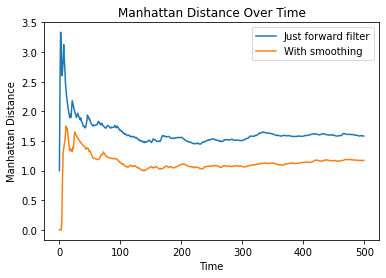

In [13]:
#case 4:
from models import *
from Filters import HMMFilter

import numpy as np
import matplotlib.pyplot as plt
import random


ROWS = 10
COLS = 10
sm = StateModel(ROWS,COLS)
tm = TransitionModel(sm)
om = ObservationModel_NUF.ObservationModel(sm)
true_state = random.randint(0, sm.get_num_of_states() - 1)
sense = None
probs = np.ones(sm.get_num_of_states()) / (sm.get_num_of_states())
#estimate = sm.state_to_position(np.argmax(probs))

rs = RobotSim(true_state, sm)
HMM = HMMFilter(probs, tm, om, sm)

error1 = 0; n_correct1 = 0; error2 = 0; n_correct2 = 0
distance1 = np.zeros(500)
distance2 = np.zeros(500)
sensor_array = [0,0,0,0,0]
probs_array = np.zeros((5,sm.get_num_of_states()))
trueStates_array = np.zeros((5,2))

for i in range(500):
    #taken from the function update() of Localizer
    trueState = rs.move_once(tm)
    sense = rs.sense_in_current_state(om)
    probs1 = HMM.filter(sense)
    sensor_array.insert(0, sense) #updating the sensor array by adding the new reading at the first position
    sensor_array = sensor_array[:-1] #removing the oldest state
    probs_array = np.insert(probs_array, 0, probs1, axis=0) #adding the newest probability into the first
    probs_array = probs_array[:5]
    probs2 = HMM.backward_smoothing(sensor_array, probs_array)
    
    fPositions1 = probs1.copy()
    fPositions2 = probs2.copy()
        
    for state in range(0, sm.get_num_of_states(), 4) :
        fPositions1[state:state+4] = sum(fPositions1[state:state+4])
        fPositions2[state:state+4] = sum(fPositions2[state:state+4])
            
    estimate1 = sm.state_to_position(np.argmax(fPositions1))
    estimate2 = sm.state_to_position(np.argmax(fPositions2))
    
    tsX, tsY, tsH = sm.state_to_pose(trueState)
    trueStates_array = np.insert(trueStates_array, 0, (tsX,tsY), axis = 0)
    trueStates_array = trueStates_array[:-1]
    
    eX1, eY1 = estimate1
    err1 = abs(tsX-eX1) + abs(tsY-eY1)
    if (err1 == 0): n_correct1 += 1
    error1 += err1
    distance1[i] = err1
    
    eX2, eY2 = estimate2
    tsX, tsY = trueStates_array[4] #comparing the estimated position with the trueState of 5 steps behind
    err2 = abs(tsX-eX2) + abs(tsY-eY2)
    if (err2 == 0): n_correct2 += 1
    error2 += err2
    distance2[i] = err2
    
avg_distance1 = np.zeros(500)
avg_distance2 = np.zeros(500)

for i in range(1,501):
    avg_distance1[i-1] = np.mean(distance1[:i])
    avg_distance2[i-1] = np.mean(distance2[:i])
    
print("avg error forward filter (error/nb_move, Manhattan distance):", error1/500)
print("avg error smoothing: ", error2/500)
print("nb of correct guesses forward filter: ", n_correct1/500 *100, "%")
print("nb of correct guesses smoothing: ", n_correct2/500 *100, "%")
plt.plot(np.arange(0, 500, 1), avg_distance1,  label = "Just forward filter")
plt.plot(np.arange(0, 500, 1), avg_distance2, label = "With smoothing")
plt.title('Manhattan Distance Over Time')
plt.xlabel('Time')
plt.ylabel('Manhattan Distance')
plt.legend()
plt.show()